In [2]:
#for array manipulations
import numpy as np
#for image processing
import cv2 
#for displaying images
import matplotlib.pyplot as plt
#to display images in this notebook, not in a separate window
%matplotlib inline
#to access system resources such as directories
import os

In [3]:
#Get our current directory
os.getcwd()

'C:\\Users\\USER\\Documents\\projects\\plant-diseases\\notebooks'

In [4]:
#set our base directory. This should point to the location of the plant-diseases folder
base_dir = 'C:\\Users\\USER\\Documents\\projects\\plant-diseases'
#list the contents of our project directory
os.listdir(base_dir)

['data', 'models', 'notebooks']

In [5]:
#set the path to our data folder
data_folder = os.path.join(base_dir, 'data')
#list the contents of our data folder
os.listdir(data_folder)

['maize']

In [6]:
#set the path to the maize folder and list the various categories available
maize_data_folder = os.path.join(data_folder, 'maize')
os.listdir(maize_data_folder)

['common_rust', 'healthy', 'leaf_spot', 'nothern_leaf_blight']

In [10]:
#This function loads 32 images of a particular disease
def get_32(disease):
    '''
    disease:
        A string that could be common_rust, healthy, leaf_spot, nothern_leaf_blight
    ........
    disease_images:
        A list of images for the selected disease
    '''
    #this list will contain the 20 images returned
    disease_images = []
    #path to the images
    disease_images_path = os.path.join(maize_data_folder, disease)
    for image_path in os.listdir(disease_images_path):
        image_path = os.path.join(disease_images_path, image_path)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        disease_images.append(image)
    return disease_images

In [26]:
common_rust_images = get_32('common_rust')
healthy_images = get_32('healthy')
leaf_spot_images = get_32('leaf_spot')
nothern_leaf_blight_images = get_32('nothern_leaf_blight')

In [27]:
len(common_rust_images)

32

In [14]:
#This function will help us plot 10 images
def plot_images(images, title):
    '''
    images: List
        List of images
    title: String
        Title for each image i.e name of disease
    '''
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.imshow(images[i])
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
    plt.show()

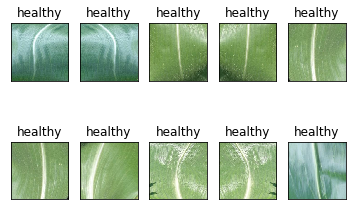

In [28]:
plot_images(healthy_images, 'healthy')

In [23]:
#This function allows us to resize
def resize(image, new_size=(600,600)):
    resized_image = cv2.resize(image, new_size)
    return resized_image

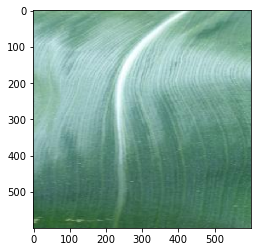

In [29]:
resized_image = resize(healthy_images[0])
plt.imshow(resized_image)

In [ ]:
'''
Image thresholding
'''

In [31]:
#Thisfunction enables us to carry out a thresholding operation
def thresh_hold(image):
    #convert to gray scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return thresh_binary

#This function plots gray scale images
def plot_grayscale(image):
    plt.imshow(image, cmap='gray')

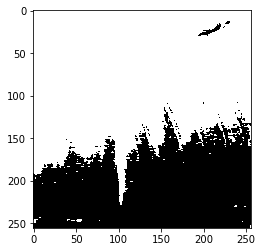

In [32]:
healthy_binary_thresh = thresh_hold(healthy_images[0])
plot_grayscale(healthy_binary_thresh)

In [ ]:
'''
This almost divides the leaf into two portions
'''

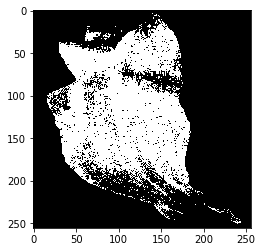

In [33]:
common_rust_binary_thresh = thresh_hold(common_rust_images[0])
plot_grayscale(common_rust_binary_thresh)

In [ ]:
'''
This brings out the spots nicely
'''

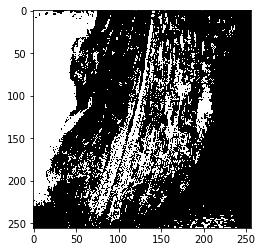

In [34]:
leaf_spot_binary_thresh = thresh_hold(leaf_spot_images[0])
plot_grayscale(leaf_spot_binary_thresh)

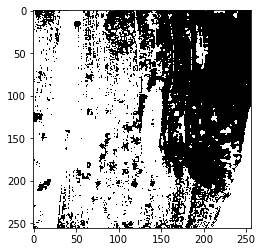

In [35]:
nothern_leaf_blight_binary_thresh = thresh_hold(nothern_leaf_blight_images[0])
plot_grayscale(nothern_leaf_blight_binary_thresh)

In [ ]:
'''
Each particular leaf looks different under binary thresholding.
The question is how to generate features from this binary thresholding?
'''

In [46]:
#Let us try other thresholding methods
def threshold_all(image):
    threshold_images = []
    names = []
    #convert to gray scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Binary thresholding
    ret, thresh_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    threshold_images.append(thresh_binary)
    names.append('Thresh Binary')
    #Inverse Binary thresholding
    ret, thresh_binary_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
    threshold_images.append(thresh_binary_inv)
    names.append('Thresh Binary Inverse')
    ret, thresh_trunc = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
    threshold_images.append(thresh_trunc)
    names.append('Thresh Trunc')
    ret, thresh_tozero = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
    threshold_images.append(thresh_tozero)
    names.append('Thresh To Zero')
    ret, thresh_tozero_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)
    threshold_images.append(thresh_tozero_inv)
    names.append('Thresh To Zero Inverse')
    
    return threshold_images, names

#This function allows us to plot threshod images
def plot_threshold_images(images, names):
    plt.figure(figsize=(16,10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], 'gray')
        plt.title(names[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

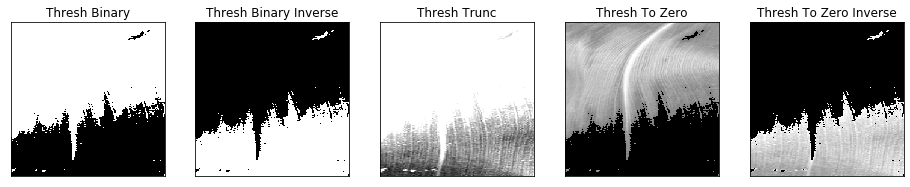

In [47]:
healthy_images_threshed, healthy_images_threshed_names = threshold_all(healthy_images[0])
plot_threshold_images(healthy_images_threshed, healthy_images_threshed_names)

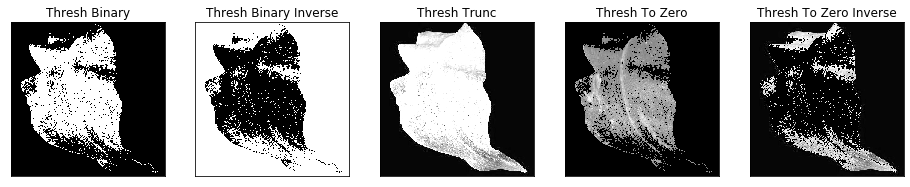

In [48]:
common_rust_images_threshed, common_rust_images_threshed_names = threshold_all(common_rust_images[0])
plot_threshold_images(common_rust_images_threshed, common_rust_images_threshed_names)

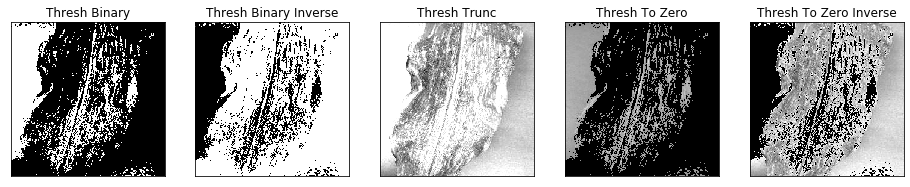

In [49]:
leaf_spot_images_threshed, leaf_spot_images_threshed_names = threshold_all(leaf_spot_images[0])
plot_threshold_images(leaf_spot_images_threshed, leaf_spot_images_threshed_names)

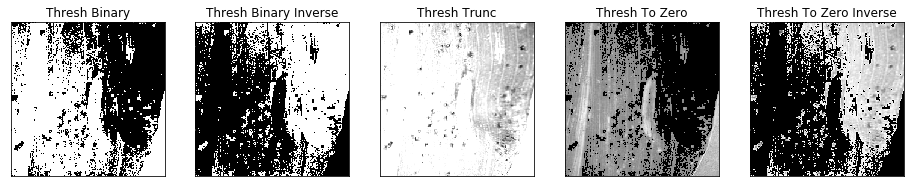

In [50]:
nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names = threshold_all(nothern_leaf_blight_images[0])
plot_threshold_images(nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names)

In [54]:
#Let us try adaptive thresholding
def adaptive_thresholding(image):
    #convert to gray scale
    threshold_images = []
    names = []
    #convert to gray scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold_images.append(gray_image)
    names.append('Original Image')
    #Global thresholding
    ret, thresh_global = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    threshold_images.append(thresh_global)
    names.append('Global Thresholding')
    #Adaptive mean thresholding
    thresh_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    threshold_images.append(thresh_mean)
    names.append('Adaptive Mean Thresholding')
    #Gaussian Thresholding
    thresh_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    threshold_images.append(thresh_gaussian)
    names.append('Adaptive Gaussian Thresholding')
    
    return threshold_images, names

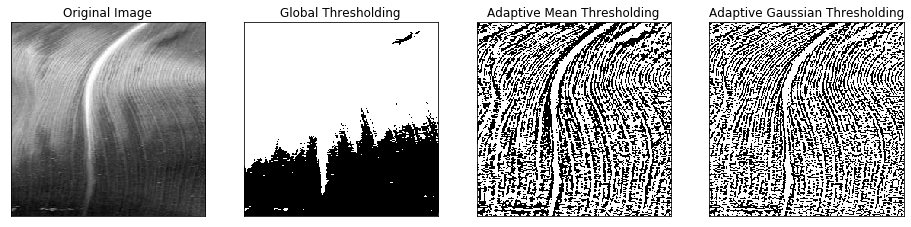

In [55]:
healthy_images_threshed, healthy_images_threshed_names = adaptive_thresholding(healthy_images[0])
plot_threshold_images(healthy_images_threshed, healthy_images_threshed_names)

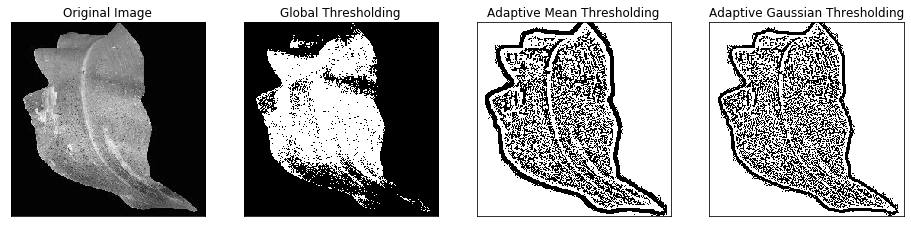

In [56]:
common_rust_images_threshed, common_rust_images_threshed_names = adaptive_thresholding(common_rust_images[0])
plot_threshold_images(common_rust_images_threshed, common_rust_images_threshed_names)

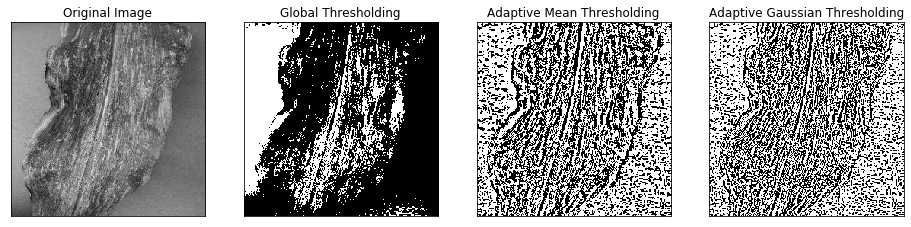

In [57]:
leaf_spot_images_threshed, leaf_spot_images_threshed_names = adaptive_thresholding(leaf_spot_images[0])
plot_threshold_images(leaf_spot_images_threshed, leaf_spot_images_threshed_names)

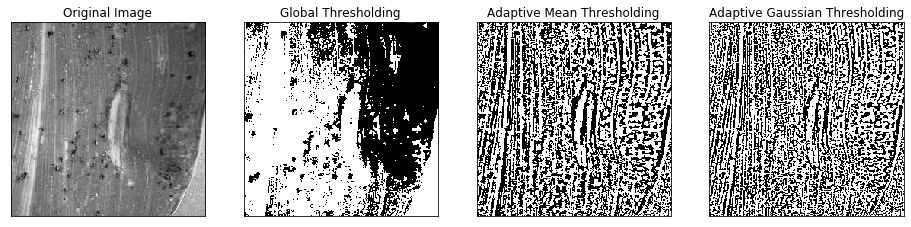

In [58]:
nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names = adaptive_thresholding(nothern_leaf_blight_images[0])
plot_threshold_images(nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names)